`Importing some modules`

In [557]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

`Reading the data from the csv file and making a pandas dataframe of it`

In [558]:
df = pd.read_csv('profiles.csv')

`Gathering some info about the dataframe`

In [559]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [560]:
print('Some descriptive statistic data of numerical variables')
df.describe()

Some descriptive statistic data of numerical variables


,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


In [561]:
print('You can see above that the height and the income columns include data unrealistic.')

You can see above that the height and the income columns include data unrealistic.


In [562]:
print('Unique values of income')
df.income.unique()

Unique values of income


array([     -1,   80000,   20000,   40000,   30000,   50000,   60000,
       1000000,  150000,  100000,  500000,   70000,  250000], dtype=int64)

In [563]:
df[df.income == -1].head(1)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single


In [564]:
print('The number of observations with income value -1 is: ', len(df[df.income == -1]))

The number of observations with income value -1 is:  48442


In [565]:
print('''We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.''')

We could drop the whole income column because -1 is not a usual categorical variable and definitely not
a continuous numerical variable. Thus we cannot use them or replace the values without avoiding bias.


In [566]:
df = df.drop('income', axis=1)

In [567]:
print('Unique values of height')
df.height.unique()

Unique values of height


array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93.,  8., 54., 82.,
        3., 86., 42., 84., 94., 50.,  6., 47., 49., 48., 90., 88., nan,
       37.,  9., 51.,  1., 92., 26., 85., 89.,  4.])

In [568]:
print('''The smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545''')

The smallest 18 year-old-man in the world is 29 inches, thus we can replace, or drop the values if they are lower than that.
https://www.mirror.co.uk/news/world-news/worlds-shortest-teenager-named-18-27050545


In [569]:
fake_heights = (df.height <= 29) | (df.height.isna())

In [570]:
df = df[~(fake_heights)]

In [571]:
df.describe()

,age,height
count,59936.000000,59936.000000
mean,32.340313,68.302306
std,9.453114,3.940899
min,18.000000,36.000000
25%,26.000000,66.000000
50%,30.000000,68.000000
75%,37.000000,71.000000
max,110.000000,95.000000


In [572]:
df.height.unique()

array([75., 70., 68., 71., 66., 67., 65., 72., 62., 64., 69., 73., 74.,
       60., 63., 76., 61., 78., 79., 59., 80., 91., 83., 77., 58., 56.,
       95., 57., 87., 81., 36., 43., 52., 55., 53., 93., 54., 82., 86.,
       42., 84., 94., 50., 47., 49., 48., 90., 88., 37., 51., 92., 85.,
       89.])

`Converting inch to cm`

In [573]:
df.height = df.height*2.54

`Take a look at the "nan" values of the whole dataframe`

In [574]:
df_isna = df.isna().sum().sort_values()
#df_isna

In [575]:
df.sign = df.sign.fillna('unknown')

`Choosing some categorical and numerical variables (with zero or little null values) and put them into a list`

In [576]:
cats_and_nums = ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'orientation', 'sex', 'sign', 'smokes', 'status']

In [577]:
df.sex.replace(['m', 'f'], ['male', 'female'], inplace=True)

In [578]:
for feature in cats_and_nums:
    print(df[feature].value_counts())

age
26     3724
27     3685
28     3583
25     3528
29     3294
24     3242
30     3148
31     2735
23     2592
32     2585
33     2206
22     1934
34     1902
35     1755
36     1582
37     1427
38     1330
21     1282
39     1171
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      458
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: count, dtype: int64
body_type
average           14652
fit               12710
athletic          11818
thin               4710
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: count, dtype: int6

In [579]:
def unique(features, data):
    for feature in features:
        if data[feature].dtype not in ['int64', 'float64']:
            data[feature] = data[feature].fillna('unknown')
            yield feature, data[feature].unique()

In [580]:
test_uniques= list(unique(cats_and_nums, df))
test_uniques

[('body_type',
  array(['a little extra', 'average', 'thin', 'athletic', 'fit', 'unknown',
         'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
         'used up', 'overweight'], dtype=object)),
 ('diet',
  array(['strictly anything', 'mostly other', 'anything', 'vegetarian',
         'unknown', 'mostly anything', 'mostly vegetarian',
         'strictly vegan', 'strictly vegetarian', 'mostly vegan',
         'strictly other', 'mostly halal', 'other', 'vegan',
         'mostly kosher', 'strictly halal', 'halal', 'strictly kosher',
         'kosher'], dtype=object)),
 ('drinks',
  array(['socially', 'often', 'not at all', 'rarely', 'unknown',
         'very often', 'desperately'], dtype=object)),
 ('drugs', array(['never', 'sometimes', 'unknown', 'often'], dtype=object)),
 ('education',
  array(['working on college/university', 'working on space camp',
         'graduated from masters program',
         'graduated from college/university', 'working on two-year college'

In [581]:
def change_values(list_of_values, dataframe, feature):
    for value in list_of_values:
        for element in dataframe[feature].unique():
            if value in element:
                dataframe[feature] = dataframe[feature].replace(element, value)
    return dataframe[feature]

In [582]:
signs_ok = ['gemini', 'cancer', 'pisces', 'aquarius', 'taurus', 'virgo', 'sagittarius', 'leo', 'aries', 'libra', 'scorpio', 'capricorn']
sings_change = change_values(signs_ok, df, 'sign')

In [583]:
diets = ['kosher', 'halal', 'anything', 'other', 'vegetarian', 'vegan']
diets_change = change_values(diets, df, 'diet')

In [584]:
edu_unique = ['working on college/university', 'working on space camp',
         'graduated from masters program',
         'graduated from college/university', 'working on two-year college',
         'unknown', 'graduated from high school',
         'working on masters program', 'graduated from space camp',
         'college/university', 'dropped out of space camp',
         'graduated from ph.d program', 'graduated from law school',
         'working on ph.d program', 'two-year college',
         'graduated from two-year college', 'working on med school',
         'dropped out of college/university', 'space camp',
         'graduated from med school', 'dropped out of high school',
         'working on high school', 'masters program',
         'dropped out of ph.d program', 'dropped out of two-year college',
         'dropped out of med school', 'high school',
         'working on law school', 'law school',
         'dropped out of masters program', 'ph.d program',
         'dropped out of law school', 'med school']

In [585]:
high_school = ['working on college/university', 'working on two-year college', 'graduated from high school', 'working on masters program', 'high school','working on law school', 'working on high school']
college = ['graduated from law school', 'two-year college', 'graduated from two-year college','working on med school', 'law school']
master = ['graduated from masters program', 'graduated from college/university', 'college/university', 'working on ph.d program', 'masters program']
phd = ['graduated from ph.d program', 'graduated from med school', 'ph.d program', 'med school']
other = ['working on space camp', 'graduated from space camp', 'space camp']
dropped = ['dropped out of space camp', 'dropped out of college/university', 'dropped out of high school', 'dropped out of ph.d program', 'dropped out of two-year college', 'dropped out of med school', 'dropped out of masters program','dropped out of law school']

In [586]:
df.education = df.education.replace(high_school, 'High School')
df.education = df.education.replace(college, 'College')
df.education = df.education.replace(master, 'Master')
df.education = df.education.replace(phd, 'Phd')
df.education = df.education.replace(other, 'Other')
df.education = df.education.replace(dropped, 'Dropped out')

`Making pie charts, countplots and histograms of the features from the list`

In [587]:
def charts(features, dataframe):
    for feat in features:
        plt.figure(figsize=[10, 7])
        data = dataframe[feat]
        title = f'Distribution of {feat} of {len(data)} participants'
        if data.dtype == 'object':
            if data.nunique() < 5:
                plt.pie(data.value_counts(), autopct='%d%%', pctdistance=.85, explode=[0.05 for i in range(data.nunique())],
                colors=sns.color_palette('Set1'))
                plt.title(title)
                plt.legend(data.unique())
                plt.gcf().gca().add_artist(plt.Circle((0, 0), 0.7, facecolor='white'))
            else:
                sns.countplot(x=data, saturation=0.75, palette='Set1')
                plt.title(title)
                plt.xticks(rotation=35, fontsize=9)
        elif data.dtype in ['int64', 'float64']:
            sns.histplot(x=feat, data = dataframe, hue='sex', bins=30)
            plt.title(title)
            mean = np.mean(data).round()
            plt.axvline(mean, color='red')
            plt.text(x=mean*1.1, y=7000, s=f'Mean: {mean}')
        plt.show()
        plt.clf()

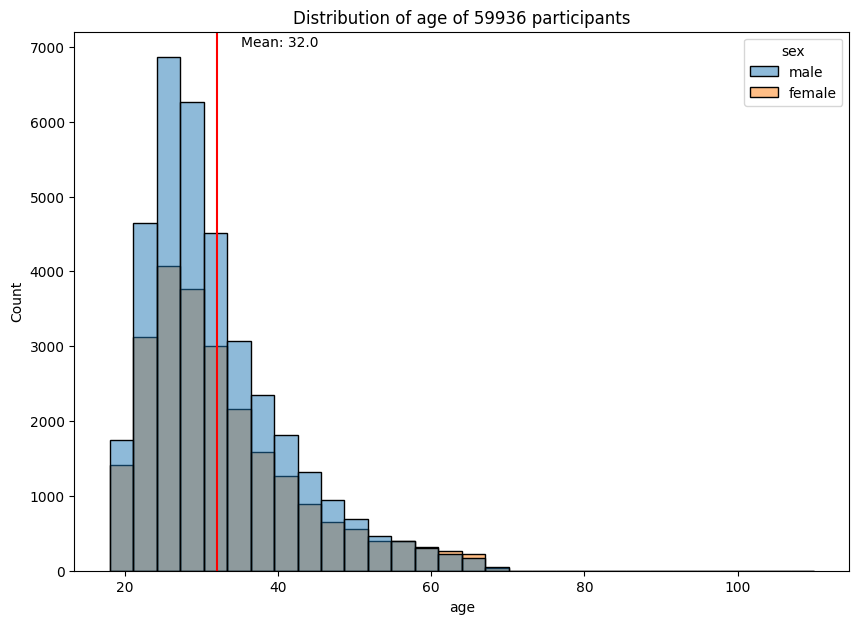

<Figure size 640x480 with 0 Axes>

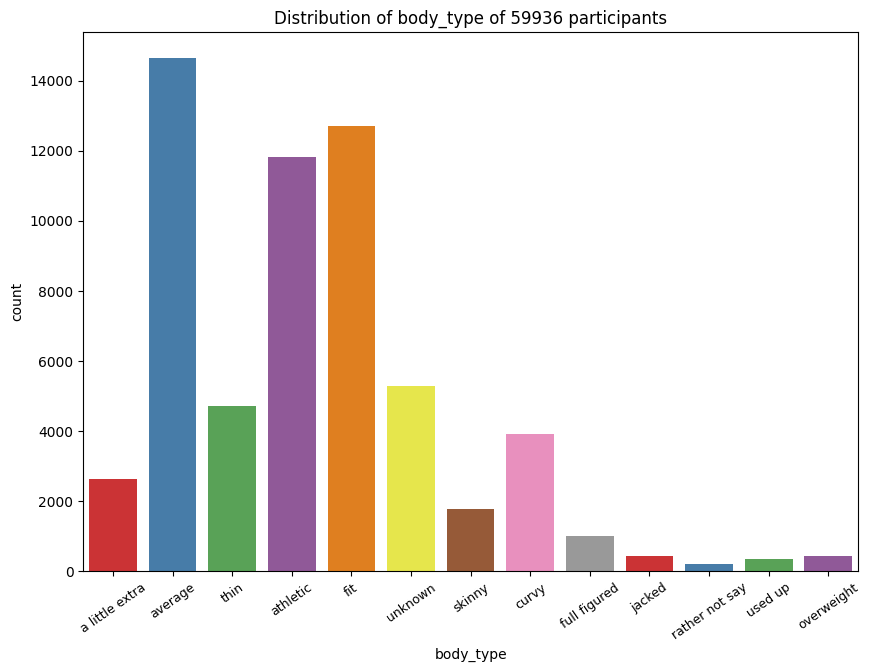

<Figure size 640x480 with 0 Axes>

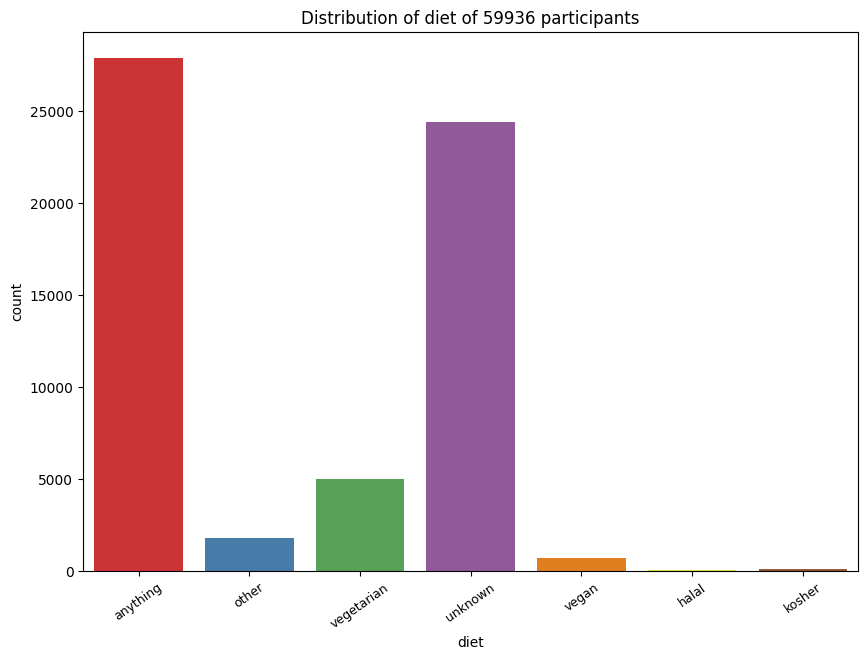

<Figure size 640x480 with 0 Axes>

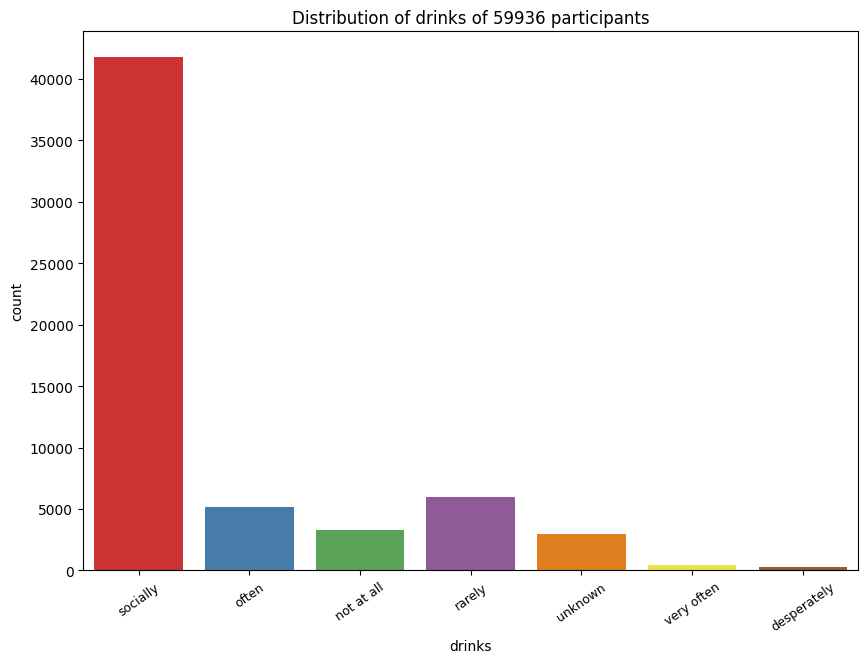

<Figure size 640x480 with 0 Axes>

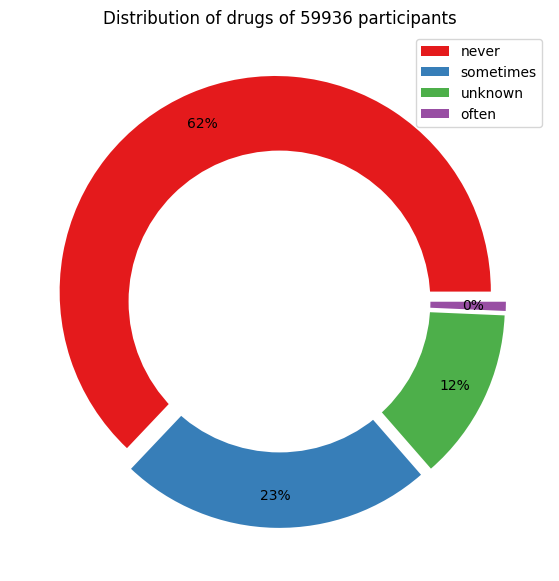

<Figure size 640x480 with 0 Axes>

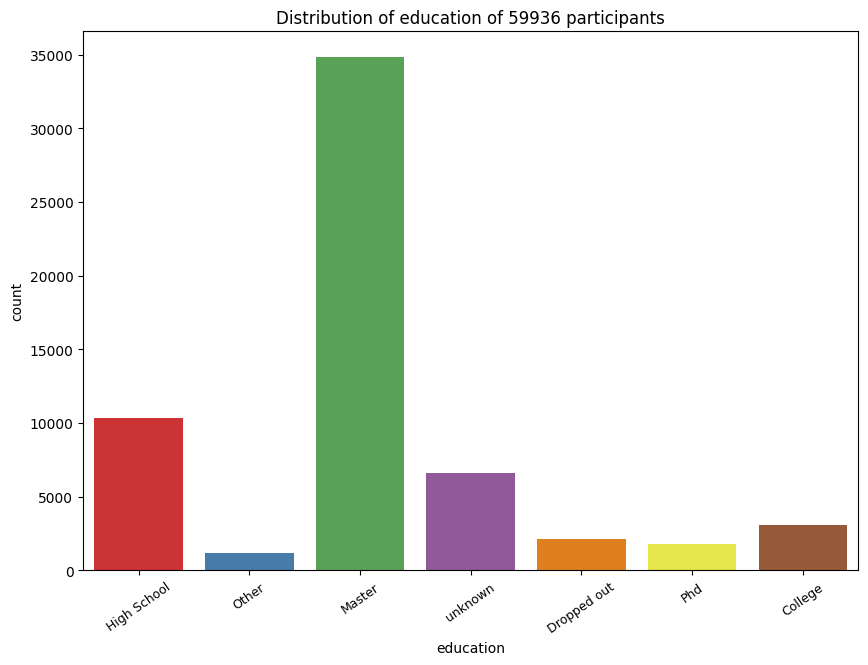

<Figure size 640x480 with 0 Axes>

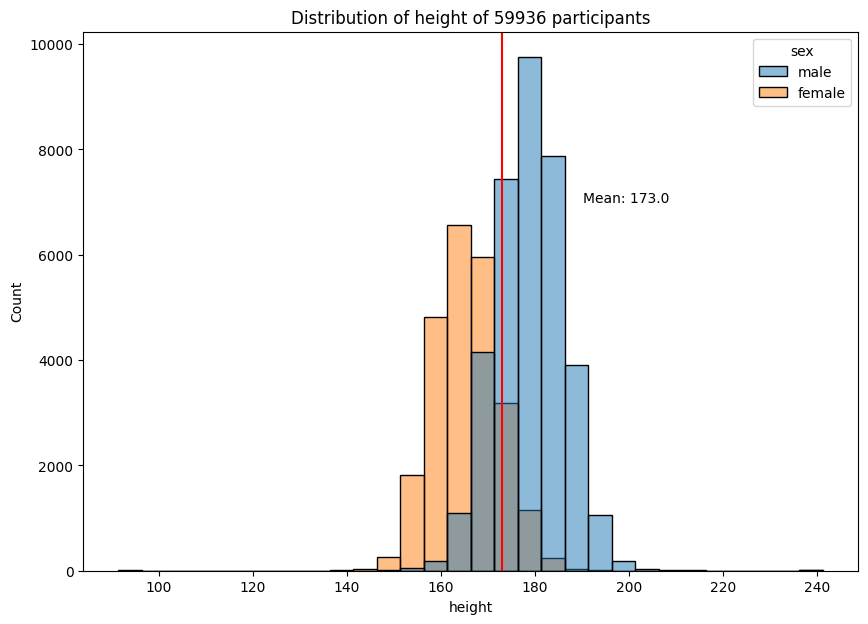

<Figure size 640x480 with 0 Axes>

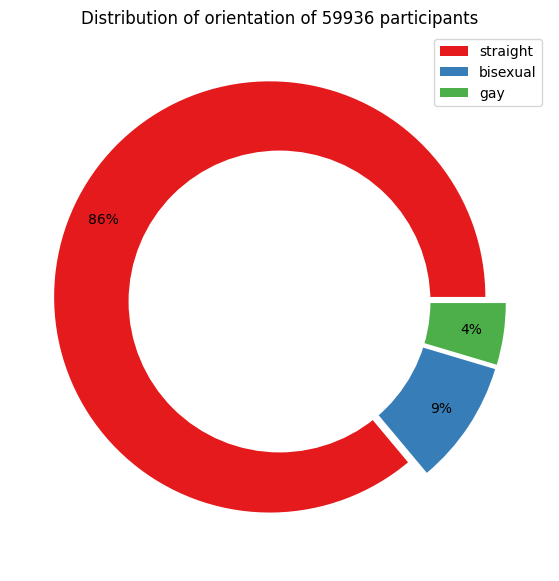

<Figure size 640x480 with 0 Axes>

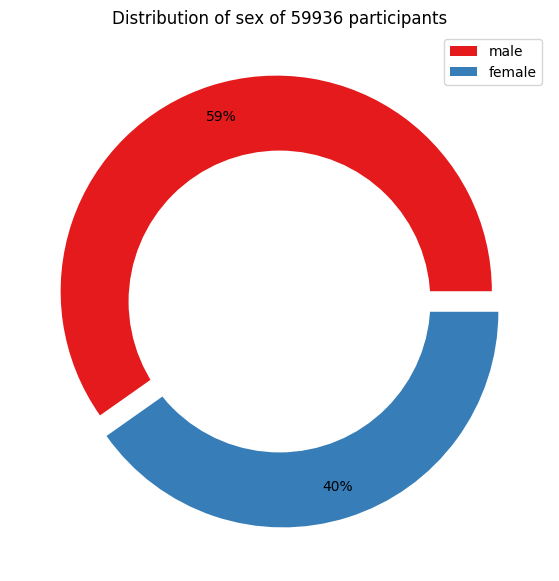

<Figure size 640x480 with 0 Axes>

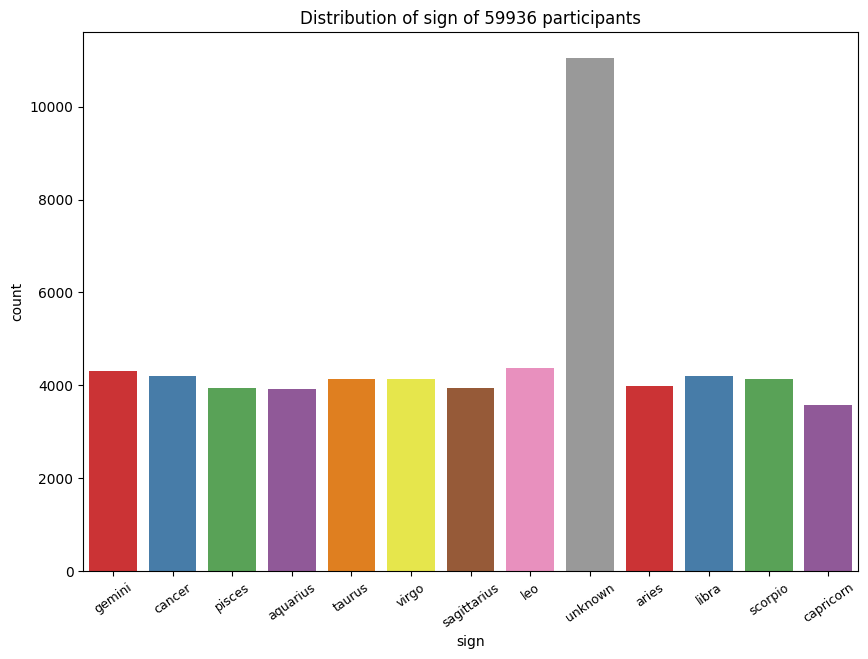

<Figure size 640x480 with 0 Axes>

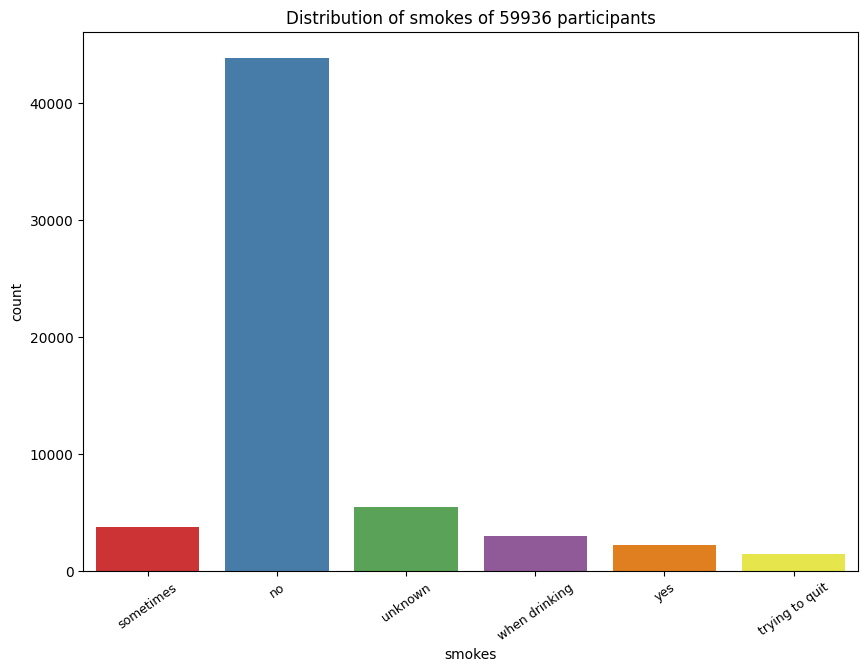

<Figure size 640x480 with 0 Axes>

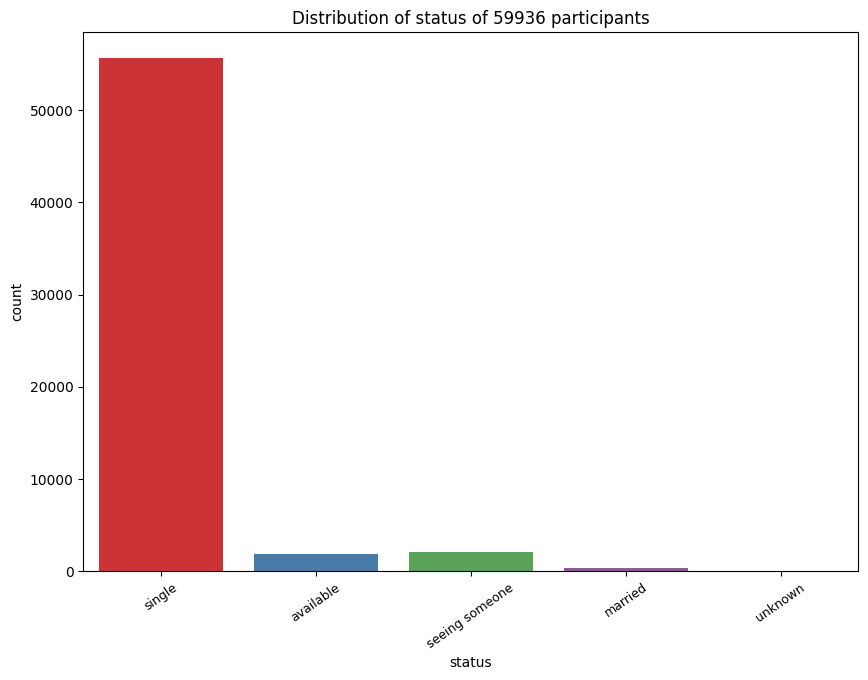

<Figure size 640x480 with 0 Axes>

In [588]:
test_charts = charts(cats_and_nums, df)

`Making some labels manually`

In [589]:
df_model = df.copy()

In [590]:
df_model.head(2)

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,anything,socially,never,High School,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,male,gemini,sometimes,english,single
1,35,average,other,often,sometimes,Other,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,male,cancer,no,"english (fluently), spanish (poorly), french (...",single


In [591]:
df_model.sex = np.where(df_model['sex'] == 'male', 1, 0)
df_model.orientation = df_model.orientation.replace(['straight', 'bisexual', 'gay'], [2, 1, 0])
df_model.status = df_model['status'].replace(['single', 'available'], 1)
df_model.status = df_model['status'].replace(['married', 'seeing someone', 'unknown'], 0)

`Making some labels automatically`

In [592]:
encodeable = [feat for feat in cats_and_nums if feat not in ['sex', 'orientation', 'status', 'age', 'height']]

In [593]:
for uncoded in encodeable:
    encoder = LabelEncoder()
    df_model[uncoded] = encoder.fit_transform(df_model[uncoded])

In [594]:
df_model = df_model[cats_and_nums]

In [595]:
df_model.head(2)

,age,body_type,diet,drinks,drugs,education,height,orientation,sex,sign,smokes,status
0,22,0,0,4,0,2,190.5,2,1,4,1,1
1,35,2,3,2,2,4,177.8,2,1,2,0,1


`Making a function to build and use LogisticRegression model.`

In [596]:
def model_log(dataframe, target):
    dataframe = dataframe[dataframe[target] != 'unknown']
    X = dataframe.drop(target, axis=1)
    y = dataframe[target]
    scaler = StandardScaler()
    scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=15)
    model = LogisticRegression(max_iter=3000)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'Logistic model': model._estimator_type, 'Features': list(X.columns), 'Target': target, 'Accuracy': accuracy}

In [597]:
log_test1 = model_log(df_model, 'orientation')
log_test2 = model_log(df_model, 'sex')
log_test3 = model_log(df_model, 'status')
log_test4 = model_log(df_model, 'drugs')
#log_test5 = model_log(df_model, 'sign')

In [598]:
print(log_test1)
print(log_test2)
print(log_test3)
print(log_test4)
#print(log_test5)

{'Logistic model': 'classifier', 'Features': ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'sex', 'sign', 'smokes', 'status'], 'Target': 'orientation', 'Accuracy': 0.8602413658862132}
{'Logistic model': 'classifier', 'Features': ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'orientation', 'sign', 'smokes', 'status'], 'Target': 'sex', 'Accuracy': 0.8377732050497748}
{'Logistic model': 'classifier', 'Features': ['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'height', 'orientation', 'sex', 'sign', 'smokes'], 'Target': 'status', 'Accuracy': 0.9614593181691786}
{'Logistic model': 'classifier', 'Features': ['age', 'body_type', 'diet', 'drinks', 'education', 'height', 'orientation', 'sex', 'sign', 'smokes', 'status'], 'Target': 'drugs', 'Accuracy': 0.6276069184138813}


In [599]:
encoder = LabelEncoder()
df.sign = encoder.fit_transform(df.sign)

In [600]:
X = df_model.drop('sign', axis=1)
y = df_model.sign

In [601]:
#df.sex = np.where(df.sex == 'male', 1, 0)
#df.orientation = np.where(df.orientation == 'straight', 1, 0)
#df.status = np.where((df.status == 'single') | (df.status == 'available'), 1, 0)
#df.smokes = np.where(df.smokes == 'no', 1, 0)
#df.drugs = np.where(df.drugs == 'never', 1, 0)
#X = df[cats_and_nums].drop('sign', axis=1)
#X = pd.get_dummies(X, drop_first=True)
#y = df.sign

In [602]:
X

,age,body_type,diet,drinks,drugs,education,height,orientation,sex,smokes,status
0,22,0,0,4,0,2,190.50,2,1,1,1
1,35,2,3,2,2,4,177.80,2,1,0,1
2,38,10,0,4,3,3,172.72,2,1,0,1
3,23,10,6,4,3,2,180.34,2,1,0,1
4,29,1,4,4,0,3,167.64,2,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
59941,59,11,4,4,0,3,157.48,2,0,0,1
59942,24,4,0,2,2,2,182.88,2,1,0,1
59943,42,2,0,1,0,3,180.34,2,1,0,1
59944,27,1,0,4,1,2,185.42,2,1,2,1


In [603]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=50)

In [604]:
bag_dt = BaggingClassifier(DecisionTreeClassifier(max_depth=5), n_estimators=10)
bag_dt.fit(x_train, y_train)
bag_accuracy = bag_dt.score(x_test, y_test)
print('Accuracy score of Bagged Classifier, 10 estimators:')
print(bag_accuracy)

Accuracy score of Bagged Classifier, 10 estimators:
0.1881881881881882


In [605]:
np.random.seed(0)
accuracy_train=[]
accuracy_test = []
depths = range(1,20)
for depth in depths:
  model = RandomForestClassifier(max_depth=depth)
  model.fit(x_train, y_train)
  y_pred_train = model.predict(x_train)
  y_pred_test = model.predict(x_test)
  accuracy_train.append(accuracy_score(y_train, y_pred_train))
  accuracy_test.append(accuracy_score(y_test, y_pred_test))

In [606]:
best_acc = np.max(accuracy_test)
best_depth = depths[np.argmax(accuracy_test)]
print('Best accuracy is: ', best_acc, ' and the best depth is: ', best_depth)

Best accuracy is:  0.19085752419085752  and the best depth is:  10


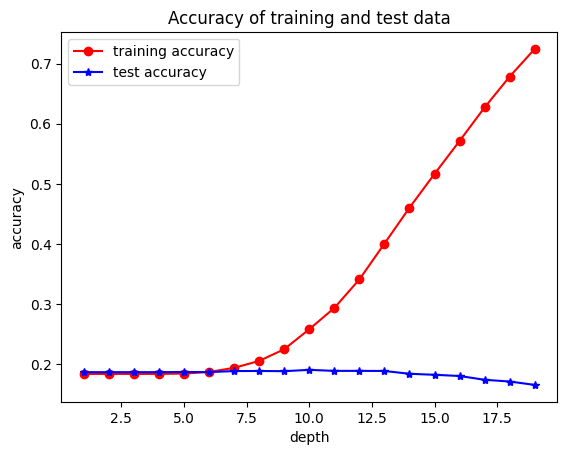

<Figure size 640x480 with 0 Axes>

In [607]:
plt.plot(depths, accuracy_train, 'r-o', depths, accuracy_test, 'b-*')
plt.title('Accuracy of training and test data')
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.legend(['training accuracy', 'test accuracy'])
plt.show()
plt.clf()

In [608]:
best_rf = RandomForestClassifier(max_depth=best_depth)
best_rf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

In [609]:
feature_importance = pd.DataFrame(zip(x_train.columns, best_rf.feature_importances_), columns=['features', 'importances']).sort_values('importances', ascending=False)

In [610]:
feature_importance.iloc[0:5]

,features,importances
5,education,0.166581
0,age,0.150454
3,drinks,0.144505
6,height,0.125578
1,body_type,0.104265
